30
[  1.16820300e-03   1.56119300e-03   2.08638800e-03   2.78826100e-03
   3.72624800e-03   4.97978000e-03   6.65500700e-03   8.89379100e-03
   1.18857100e-02   1.58841400e-02   2.12276600e-02   2.83687600e-02
   3.79121800e-02   5.06660600e-02   6.77104300e-02   9.04886100e-02
   1.20929500e-01   1.61610900e-01   2.15977800e-01   2.88634000e-01
   3.85732100e-01   5.15494700e-01   6.88910100e-01   9.20663500e-01
   1.23038000e+00   1.64428700e+00   2.19743500e+00   2.93666500e+00
   3.92457600e+00   5.24482700e+00]


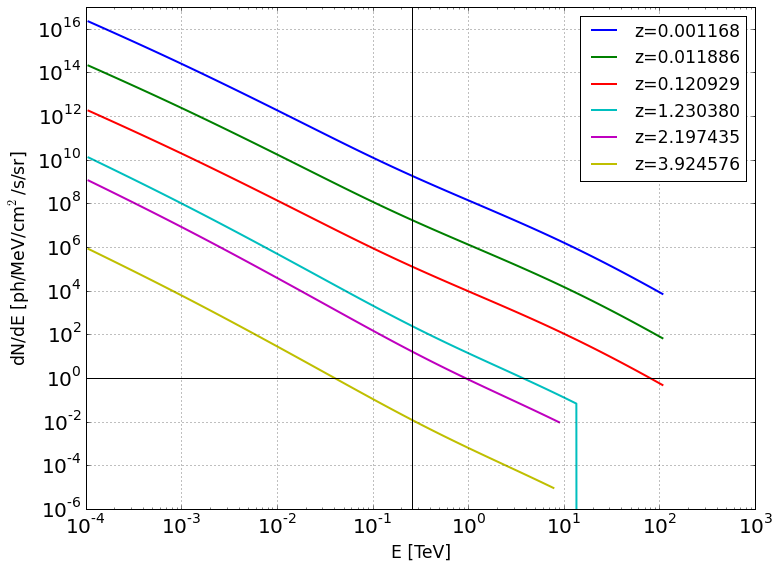

In [8]:
%matplotlib inline 
from numpy import loadtxt, size, arange, nanmin, where, nansum
from matplotlib.pyplot import plot, matshow, figure, show
from matplotlib.colors import LogNorm
from src.analytic import Ethreshold_gg

import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size
mpl.rcParams['ytick.labelsize'] = label_size

mat = loadtxt("Results/EmissMatrix__PLE_Paper_10TeV.txt",unpack=True)

E = mat[1:,0]*1e-6
z = mat[0,1:]
print size(z)
print z
Emiss = mat[1:,1:]
i_min=min(where(E>Ethreshold_gg()*1e-3)[0])

mins=nanmin(Emiss,1)
Emiss /= Emiss[i_min,27]#min(mins[mins!=0])

fig = figure(figsize=(12,9))
ax = fig.add_subplot(111)
for i in [0,8,16,24,26,28]:#arange(0,shape(z)[0],4):
   ax.plot(E,Emiss[:,i],linewidth=2,label="z=%f"%z[i])

ax.axhline(y=1, xmin=1e-4,xmax=1e3,color='k')
ax.axvline(x=Ethreshold_gg()*1e-3, ymin=1e-3,ymax=1e9,color='k')

ax.legend(loc="best",fontsize="xx-large")
ax.set_xlabel("E [TeV]",fontsize="xx-large")
ax.set_ylabel("dN/dE [ph/MeV/cm$^2$/s/sr]",fontsize="xx-large")
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(b=True,which='major')